### 1. Check missing values and duplicate records

In [61]:
#import libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_colwidth', None)       # display col width

#connect with dataset

df = pd.read_csv("Different_stores_dataset.csv")



In [62]:
df.info()    # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [63]:

stacked_df  = df.stack()
stacked_df.unique()

array(['I138884', '10/30/2016 9:58', 'C241288', ..., 'C800631', 'I232867',
       'C273973'], dtype=object)

### 2. Add column name 'Total Sales'

In [64]:
df['Total Sales'] = df.quantity * df.selling_price_per_unit
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00


### 3. How many customers have age more than 60?

In [65]:
df[df['age']> 60].count()


,0
invoice_no,17169
invoice_date,17169
customer_id,17169
gender,17169
age,17169
category,17169
quantity,17169
selling_price_per_unit,17169
cost_price_per_unit,17169
payment_method,17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [66]:
len(df['customer_id'].unique())         # no duplicates

99457

### 5. Are there more male or female customers, Show in Pie Chart?

[39975, 59482] ['Male', 'Female']


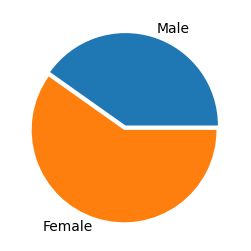

 Male = 39975, Female = 59482, Total = 99457


In [67]:
Labels = ['Male', 'Female']
Gender = [0,0]
for i in df['gender']:
    if i =='Male':
        Gender[0] = Gender[0]+1
    elif i =='Female':
        Gender[1] = Gender[1]+1
print(Gender, Labels)
# Creating plot
plt.figure(figsize=(5, 3))
ax = [0,.05]
plt.pie(Gender, labels=Labels, explode=ax)

# show plot
plt.show()


print(f' Male = {Gender[0]}, Female = {Gender[1]}, Total = {sum(Gender)}')




### 6. Which category is least popular among customers?

Least popular category: Souvenir
Sales of each category = {'Clothing': 103598, 'Shoes': 30217, 'Books': 14989, 'Cosmetics': 45501, 'Food & Beverage': 44281, 'Toys': 30321, 'Technology': 15033, 'Souvenir': 14871}


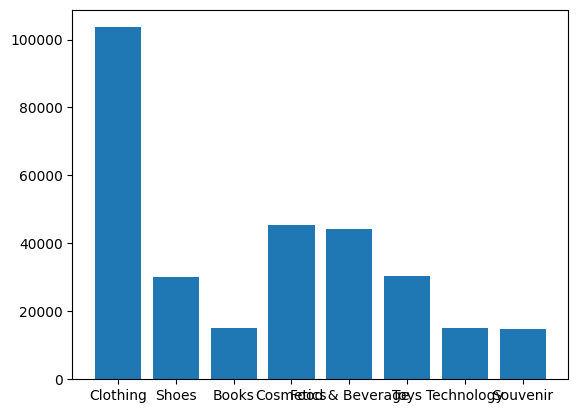

In [68]:

catwise_quantity = {'Clothing':0, 'Shoes':0, 'Books':0, 'Cosmetics':0, 'Food & Beverage':0, 'Toys':0,'Technology':0 ,'Souvenir':0}
for cat, qty in zip(df.category, df.quantity):
    for i,v in catwise_quantity.items():
        if  i == cat:
            catwise_quantity[i]= catwise_quantity[i]+qty
print("Least popular category:" ,min(catwise_quantity, key=catwise_quantity.get))
print(f'Sales of each category = {catwise_quantity}')


plt.bar(range(len(catwise_quantity)), list(catwise_quantity.values()), align='center')
plt.xticks(range(len(catwise_quantity)), list(catwise_quantity.keys()))
plt.show()

### 7. Which category has the highest sales volume?

In [69]:
print("Higher valume popular category:" ,max(catwise_quantity, key=catwise_quantity.get))
print(f'Sales of each category = {catwise_quantity}')

Higher valume popular category: Clothing
Sales of each category = {'Clothing': 103598, 'Shoes': 30217, 'Books': 14989, 'Cosmetics': 45501, 'Food & Beverage': 44281, 'Toys': 30321, 'Technology': 15033, 'Souvenir': 14871}


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [70]:
df['Total Profit'] = df['Total Sales'] - (df['quantity']* df['cost_price_per_unit'])
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,1680.0000


### 9. Display the top 10 invoices with the highest quantities sold?

In [71]:
df.nlargest(10, ['quantity'])

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,7087.500
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,390.336
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,52.752
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,165.220
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,3000.80,750.200
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,2250.600
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,3000.80,80.200
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,1097.82,31.455
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,121.20,0.360
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,650.56,195.168


### 10. Which payment method is most commonly used?

In [72]:
df.groupby(df.payment_method).size()


,0
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079


### 11. Total Sales with respect to region?

In [73]:
df.region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [74]:
df.groupby(df.region).size()

,0
region,
Central,23099
East,28306
South,16209
West,31843


### 12. Sort Malls with average sales higher to lower?

In [125]:
grouped = df.groupby(['shopping_mall', 'Total Sales'])
grouped.first()


invoice_no      invoice_date customer_id  gender  \
shopping_mall Total Sales                                                    
Istinye Park  5.23           I412481  10/30/2016 10:03     C125696  Female   
              11.73          I335039  10/30/2016 13:33     C209245    Male   
              15.15          I237375  10/30/2016 11:28     C297425  Female   
              20.92          I374693  10/30/2016 12:08     C284366  Female   
              35.84          I283774  10/30/2016 11:54     C210614  Female   
...                              ...               ...         ...     ...   
Zorlu Center  9450.00        I158508  10/30/2016 14:42     C369937  Female   
              9602.72        I217053  10/30/2016 10:04     C192344    Male   
              15004.25       I276526  10/30/2016 10:15     C136117  Female   
              16800.00       I119678  10/30/2016 12:40     C506925  Female   
              26250.00       I318625  10/30/2016 12:31     C319935    Male   

                           age         category  quantity  \
shopping_mall Total Sales                                   
Istinye Park  5.23          27  Food & Beverage         1   
              11.73         36         Souvenir         1   
              15.15         50            Books         1   
              20.92         20  Food & Beverage         2   
              35.84         42             Toys         1   
...                        ...              ...       ...   
Zorlu Center  9450.00       64       Technology         3   
              9602.72       50            Shoes         4   
              15004.25      57            Shoes         5   
              16800.00      41       Technology         4   
              26250.00      48       Technology         5   

                           selling_price_per_unit  cost_price_per_unit  \
shopping_mall Total Sales                                                
Istinye Park  5.23                           5.23                3.661   
              11.73                         11.73                8.211   
              15.15                         15.15               10.605   
              20.92                         10.46                7.322   
              35.84                         35.84               25.088   
...                                           ...                  ...   
Zorlu Center  9450.00                     3150.00             2677.500   
              9602.72                     2400.68             2280.646   
              15004.25                    3000.85             2700.765   
              16800.00                    4200.00             3780.000   
              26250.00                    5250.00             4725.000   

                          payment_method   region         state  Total Profit  
shopping_mall Total Sales                                                      
Istinye Park  5.23                  Cash  Central          Iowa         1.569  
              11.73                 Cash     East      New York         3.519  
              15.15                 Cash    South       Florida         4.545  
              20.92                 Cash     West    California         6.276  
              35.84           Debit Card     West      Colorado        10.752  
...                                  ...      ...           ...           ...  
Zorlu Center  9450.00               Cash     East  Pennsylvania      1417.500  
              9602.72               Cash     East  Pennsylvania       480.136  
              15004.25        Debit Card    South     Tennessee      1500.425  
              16800.00              Cash     East  Pennsylvania      1680.000  
              26250.00              Cash     East          Ohio      2625.000  

[291 rows x 13 columns]

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

### 14.  What is the total number of transactions per region for each payment method?

In [46]:
df.groupby(df.region).size()

,0
region,
Central,23099
East,28306
South,16209
West,31843


### 15. How do sales in different categories compare between males and females?